In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler,minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

Load CSV
→ EDA (scatter plot)
→ Clean data
→ Split train-test
→ PolynomialFeatures
→ Scaling
→ Linear Regression
→ Prediction
→ Evaluation
→ Visualization

In [159]:
df = pd.read_csv('Ice_cream selling data.csv')

In [160]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [161]:
x = df[['Temperature (°C)']]
y = df['Ice Cream Sales (units)']

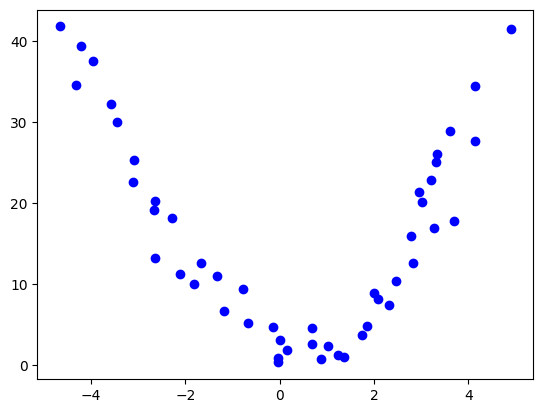

In [162]:
plt.scatter(df['Temperature (°C)'], df['Ice Cream Sales (units)'], color='blue')

# it is non-linear data, so we will use Polynomial Features to transform the data before applying Linear Regression.

In [163]:
df.corr()

,Temperature (°C),Ice Cream Sales (units)
Temperature (°C),1.000000,-0.175184
Ice Cream Sales (units),-0.175184,1.000000


In [164]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42
)

In [165]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
model.score(x_train,y_train)

0.06579063815950037

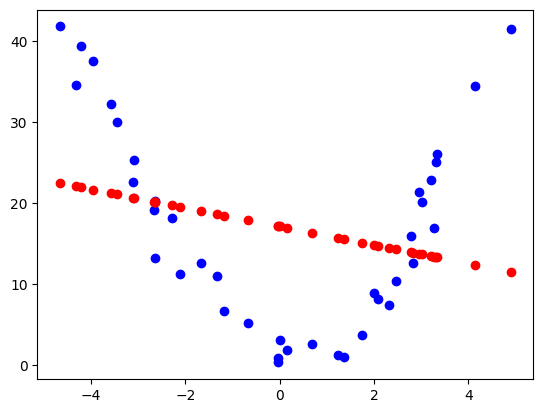

In [166]:
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_train, y_pred, color='red')

In [167]:
model.score(x_test,y_test)

-0.5751270190188227

In [168]:
poly = PolynomialFeatures()
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
# x_train_poly

In [169]:
model = LinearRegression()
model.fit(x_train_poly,y_train)

LinearRegression()

In [170]:
model.score(x_train_poly,y_train)

0.9413665676490518

In [171]:
model.score(x_test_poly,y_test)

0.843055137193884

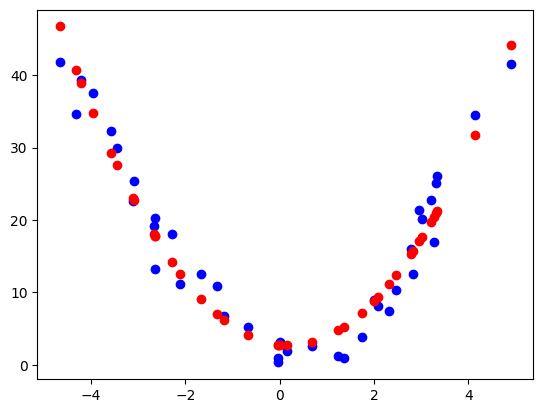

In [172]:
plt.scatter(x_train, y_train, color='blue')
plt.scatter(x_train,model.predict(x_train_poly), color='red')